# Project Title: Facial Emotion Recognition for Mental Wellness Monitoring
### Goal:
 Build and deploy a system that detects human emotions (e.g. happy, sad, angry, neutral) from facial images to help mental health apps understand users’ emotional states in real time.

### Why this matters:
 Emotional monitoring can help improve chatbot responses, tailor wellness content, and alert when users show signs of distress.


In [7]:
# Install Kaggle API package to access dataset
!pip install -q kaggle

In [8]:
# Upload kaggle.json (file containing Kaggle API key)

In [9]:
# Setup Kaggle credentials
# Move kaggle.json to correct location
!mkdir -p ~/.kaggle  #  Create hidden folder for Kaggle configuration
!cp kaggle.json ~/.kaggle/ # Copy the token there
!chmod 600 ~/.kaggle/kaggle.json # Set permissions (only you can read it)

print(" Kaggle API configured successfully")

 Kaggle API configured successfully


In [10]:
# Download FER-2013 dataset from Kaggle
print(" Downloading FER-2013 dataset from Kaggle...")
!kaggle datasets download -d msambare/fer2013

print(" Download complete")

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.53GB/s]
 Download complete


In [11]:
# Unzip the dataset
import zipfile
import os

# Unzip dataset
print(" Unzipping dataset...")
with zipfile.ZipFile('fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

print(" Dataset extracted")

# Check folder structure
print("\n Folder structure:")
for root, dirs, files in os.walk('data'):
    level = root.replace('data', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    if level < 2:  # Only show 2 levels deep
        subindent = ' ' * 2 * (level + 1)
        for file in files[:3]:  # Show first 3 files
            print(f'{subindent}{file}')
        if len(files) > 3:
            print(f'{subindent}... and {len(files) - 3} more files')

 Unzipping dataset...
 Dataset extracted

 Folder structure:
data/
  train/
    sad/
    happy/
    neutral/
    surprise/
    angry/
    disgust/
    fear/
  test/
    sad/
    happy/
    neutral/
    surprise/
    angry/
    disgust/
    fear/


In [12]:
# Explore the dataset to understand the data before training
import os

# Count images per emotion
def count_images(base_path):
    """Count images in each emotion folder"""
    emotions = {}
    for emotion in os.listdir(base_path):
        emotion_path = os.path.join(base_path, emotion)
        if os.path.isdir(emotion_path):
            num_images = len(os.listdir(emotion_path))
            emotions[emotion] = num_images
    return emotions

# Count train and test images
train_counts = count_images('data/train')
test_counts = count_images('data/test')

print("=" * 50)
print(" DATASET STATISTICS")
print("=" * 50)

print("\n TRAINING SET:")
total_train = 0
for emotion, count in sorted(train_counts.items()):
    print(f"  {emotion:12s}: {count:,} images")
    total_train += count
print(f"  {'TOTAL':12s}: {total_train:,} images")

print("\n TEST SET:")
total_test = 0
for emotion, count in sorted(test_counts.items()):
    print(f"  {emotion:12s}: {count:,} images")
    total_test += count
print(f"  {'TOTAL':12s}: {total_test:,} images")

print("\n" + "=" * 50)
print(f" Total dataset: {total_train + total_test:,} images")
print("=" * 50)

 DATASET STATISTICS

 TRAINING SET:
  angry       : 3,995 images
  disgust     : 436 images
  fear        : 4,097 images
  happy       : 7,215 images
  neutral     : 4,965 images
  sad         : 4,830 images
  surprise    : 3,171 images
  TOTAL       : 28,709 images

 TEST SET:
  angry       : 958 images
  disgust     : 111 images
  fear        : 1,024 images
  happy       : 1,774 images
  neutral     : 1,233 images
  sad         : 1,247 images
  surprise    : 831 images
  TOTAL       : 7,178 images

 Total dataset: 35,887 images


In [ ]:
# Visualize sample images
# import visualization libraries
import matplotlib.pyplot as plt # Creates plots and displays images. Show images in grid
import cv2 # Computer vision library. Load and process images
import numpy as np # Array operations. Handle image data (pixels)
import random # Random selection. Pick random images to show
from PIL import Image # Image processing. Alternative image loading

print(" Visualization libraries loaded")

 Visualization libraries loaded!


In [14]:
# Function to load random images
def load_random_images(data_dir, emotion, num_images=9):
    """
    Load random images from a specific emotion folder

    WHY THIS FUNCTION:
    - We have thousands of images per emotion
    - Can't look at all of them manually
    - Random sampling gives us a representative view

    Args:
        data_dir: Path to train or test folder
        emotion: Which emotion folder (e.g., 'happy', 'sad')
        num_images: How many random images to show

    Returns:
        List of image arrays
    """
    emotion_path = os.path.join(data_dir, emotion)

    # Get all image filenames in this emotion folder
    # WHY: We need to know what images are available
    image_files = os.listdir(emotion_path)

    # Randomly select num_images from the list
    # WHY: Random = unbiased sample of the data
    selected_files = random.sample(image_files, min(num_images, len(image_files)))

    images = []
    for img_file in selected_files:
        img_path = os.path.join(emotion_path, img_file)

        # Load image using OpenCV
        # WHY: cv2.imread reads image as numpy array (pixels)
        img = cv2.imread(img_path)

        # Convert BGR to RGB
        # WHY: OpenCV loads as BGR, but matplotlib expects RGB
        # BGR = Blue-Green-Red (OpenCV default)
        # RGB = Red-Green-Blue (normal)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img)

    return images

print(" Image loading function created")

 Image loading function created


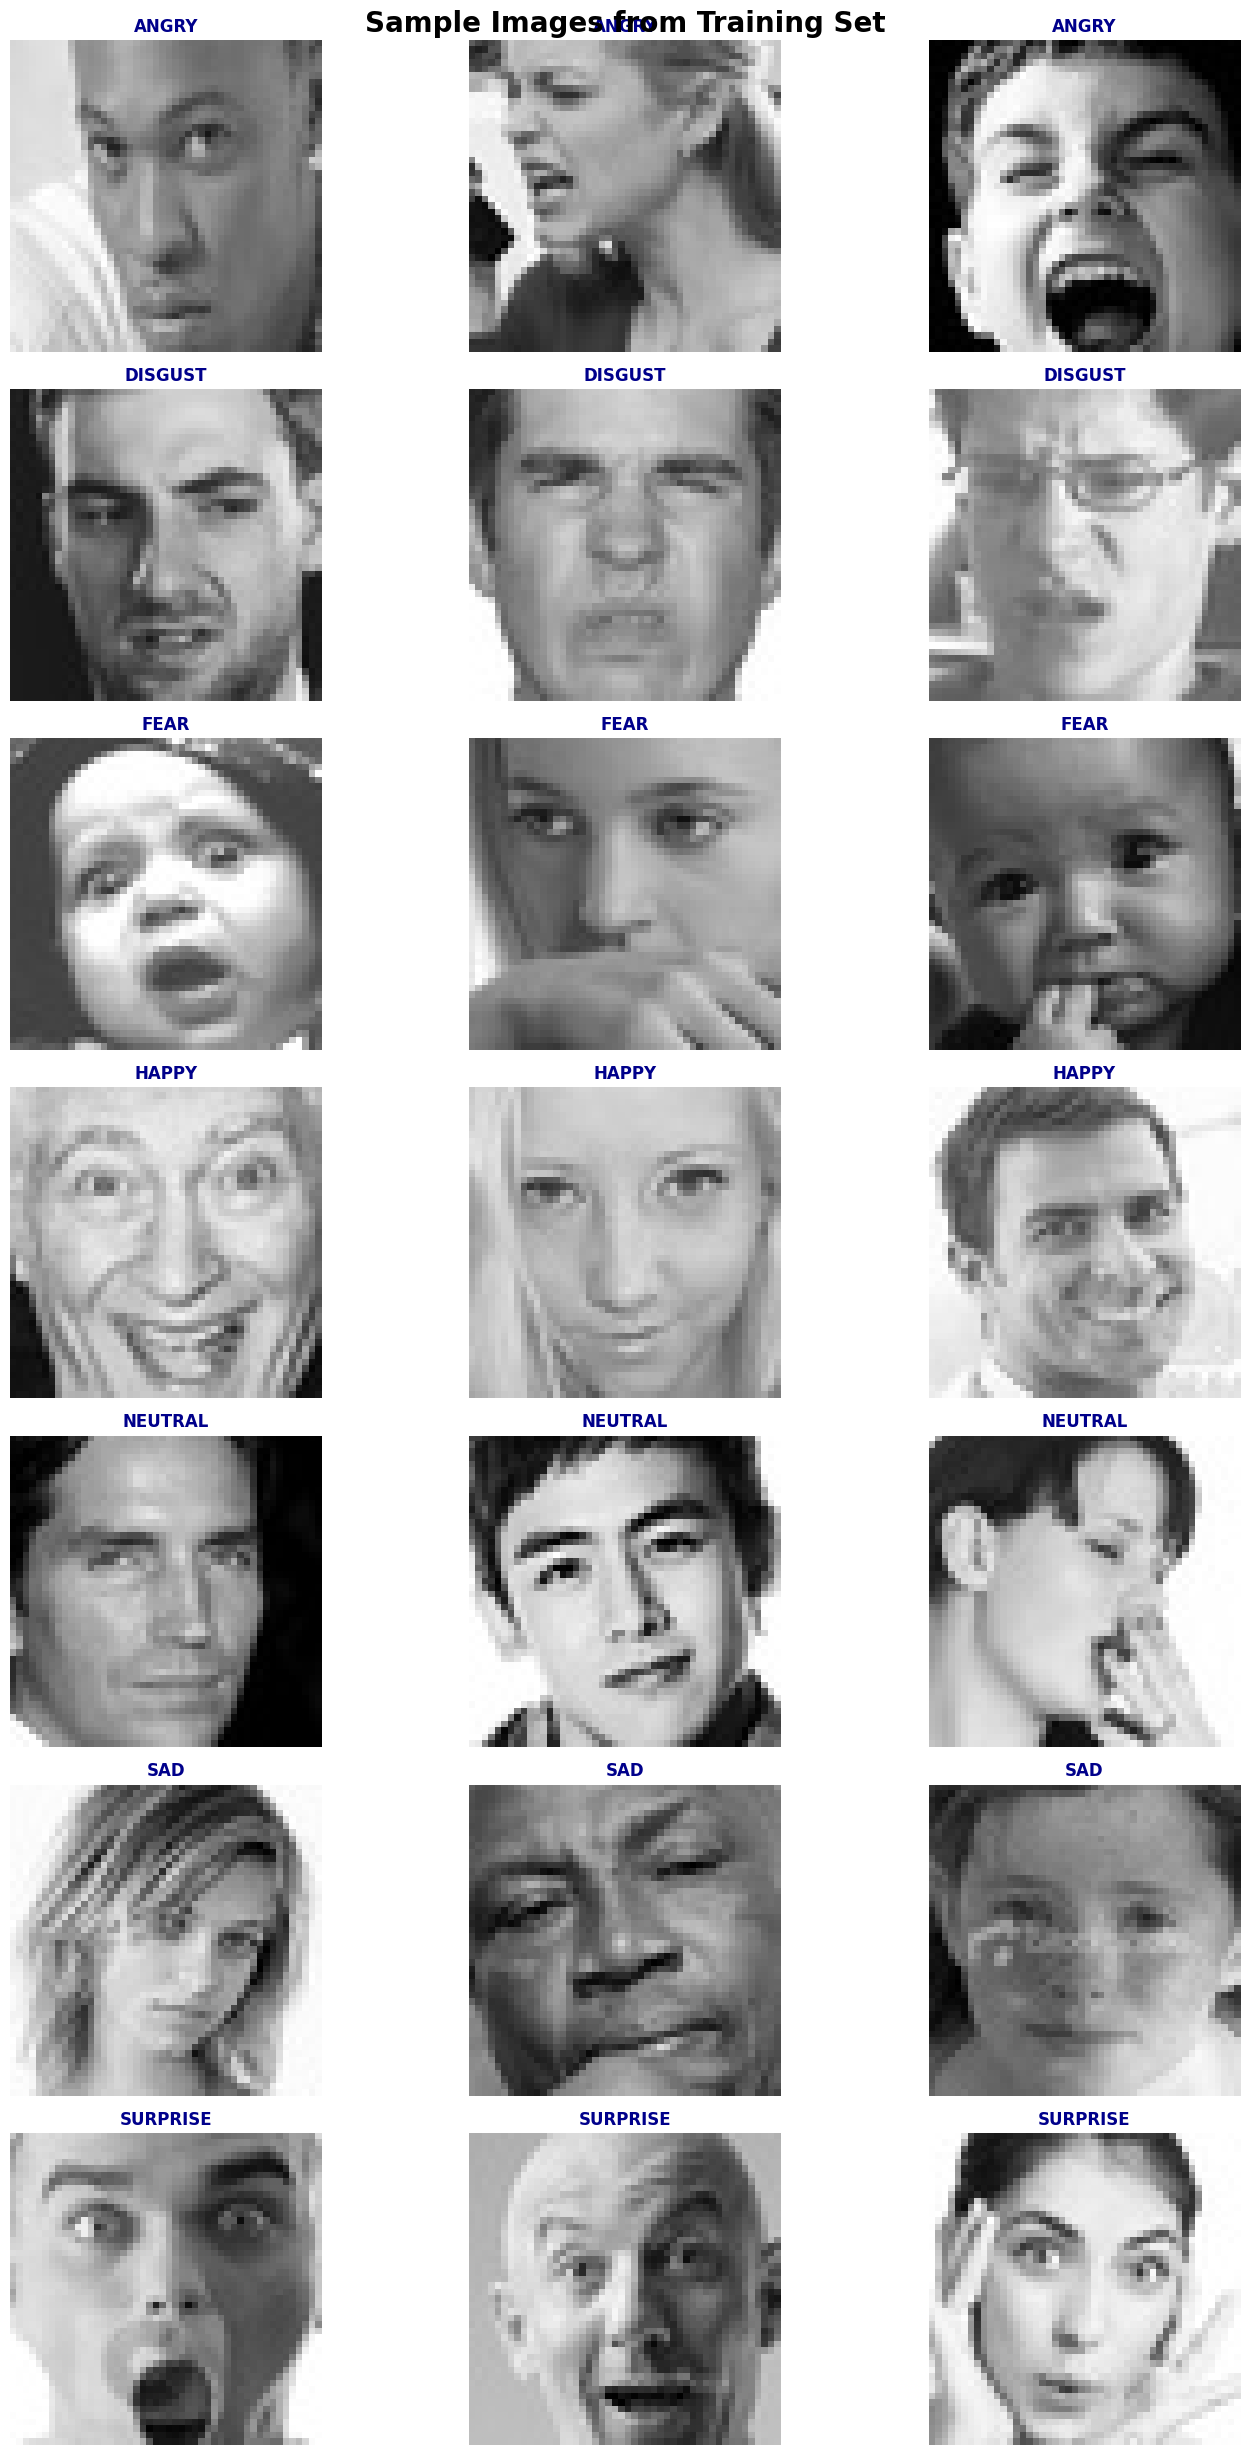

 Visualization complete!


In [ ]:
# Visualize some images
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_dir = 'data/train'

fig, axes = plt.subplots(7, 3, figsize=(15, 25))
fig.suptitle('Sample Images from Training Set', fontsize=20, fontweight='bold')

for i, emotion in enumerate(emotions):
    images = load_random_images(train_dir, emotion, num_images=3)

    for j, img in enumerate(images):
        ax = axes[i, j]
        ax.imshow(img)
        ax.axis('off')

        # Label EVERY image
        # WHY: Makes it crystal clear which emotion each image represents
        ax.set_title(f'{emotion.upper()}',
                    fontsize=12,
                    fontweight='bold',
                    color='darkblue')

plt.tight_layout()
plt.show()

print(" Visualization complete")

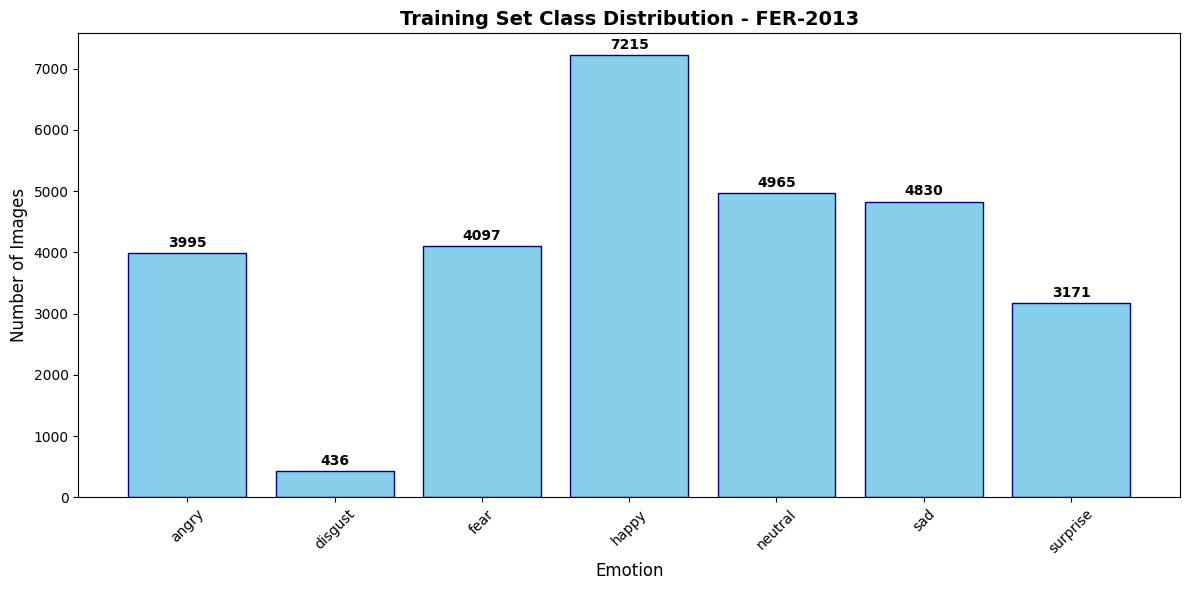

Training Set Statistics:
Angry       :  3995 images (13.92%)
Disgust     :   436 images ( 1.52%)
Fear        :  4097 images (14.27%)
Happy       :  7215 images (25.13%)
Neutral     :  4965 images (17.29%)
Sad         :  4830 images (16.82%)
Surprise    :  3171 images (11.05%)
Total       : 28709 images

Calculated Class Weights (for training):
Angry        (class 0): 1.027
Disgust      (class 1): 9.407
Fear         (class 2): 1.001
Happy        (class 3): 0.568
Neutral      (class 4): 0.826
Sad          (class 5): 0.849
Surprise     (class 6): 1.293


In [16]:
#  Data Preprocessing & Augmentation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
train_dir = '/content/data/train/'
test_dir = '/content/data/test/'

# Emotion labels (alphabetical order to match folder names)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Count images per emotion in training set
train_counts = {}
for emotion in emotion_labels:
    emotion_path = os.path.join(train_dir, emotion)
    count = len(os.listdir(emotion_path))
    train_counts[emotion] = count

# Visualize distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(emotion_labels, train_counts.values(), color='skyblue', edgecolor='navy')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Training Set Class Distribution - FER-2013', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Add count labels on bars
for i, (emotion, count) in enumerate(train_counts.items()):
    plt.text(i, count + 100, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("Training Set Statistics:")
print("="*50)
total_train = sum(train_counts.values())
for emotion, count in train_counts.items():
    percentage = (count / total_train) * 100
    print(f"{emotion.capitalize():12s}: {count:5d} images ({percentage:5.2f}%)")
print(f"{'Total':12s}: {total_train:5d} images")

# Calculate class weights for handling imbalance
print("\n" + "="*50)
print("Calculated Class Weights (for training):")
print("="*50)

class_weights = {}
num_classes = len(emotion_labels)

for i, emotion in enumerate(emotion_labels):
    count = train_counts[emotion]
    weight = total_train / (num_classes * count)
    class_weights[i] = weight
    print(f"{emotion.capitalize():12s} (class {i}): {weight:.3f}")

In [17]:
# Create train/validation split
# Since the data comes with a test/ folder, split train/ into train (85%) and validation (15%)
# Keras ImageDataGenerator works best with physical folder structures
# Clean separation prevents accidental data leakage
from sklearn.model_selection import train_test_split
import shutil

# Create validation directory structure
val_dir = '/content/data/val/'
os.makedirs(val_dir, exist_ok=True)

print("Creating validation split (15% of training data)...")
print("="*50)

# For each emotion folder
for emotion in emotion_labels:
    # Create emotion subfolder in validation directory
    os.makedirs(os.path.join(val_dir, emotion), exist_ok=True)

    # Get all image files for this emotion
    emotion_train_path = os.path.join(train_dir, emotion)
    image_files = os.listdir(emotion_train_path)

    # Split 85% train, 15% validation (stratified by emotion)
    train_files, val_files = train_test_split(
        image_files,
        test_size=0.15,
        random_state=42  # Reproducibility
    )

    # Move validation files
    for img_file in val_files:
        src = os.path.join(emotion_train_path, img_file)
        dst = os.path.join(val_dir, emotion, img_file)
        shutil.move(src, dst)

    print(f"{emotion.capitalize():12s}: {len(train_files):5d} train | {len(val_files):4d} val")

print("="*50)
print(" Validation split created!")

# Verify the split
print("\nFinal Dataset Splits:")
print("="*50)

for split_name, split_dir in [('Train', train_dir), ('Validation', val_dir), ('Test', test_dir)]:
    total = sum(len(os.listdir(os.path.join(split_dir, emotion))) for emotion in emotion_labels)
    print(f"{split_name:12s}: {total:5d} images")


Creating validation split (15% of training data)...
Angry       :  3395 train |  600 val
Disgust     :   370 train |   66 val
Fear        :  3482 train |  615 val
Happy       :  6132 train | 1083 val
Neutral     :  4220 train |  745 val
Sad         :  4105 train |  725 val
Surprise    :  2695 train |  476 val
 Validation split created!

Final Dataset Splits:
Train       : 24399 images
Validation  :  4310 images
Test        :  7178 images


In [18]:
# Set up data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with realistic augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixels to [0, 1]

    # CONSERVATIVE augmentation for faces:
    rotation_range=15,       # ±15° rotation (realistic head tilt)
    width_shift_range=0.1,   # Shift 10% horizontally
    height_shift_range=0.1,  # Shift 10% vertically
    zoom_range=0.1,          # Zoom ±10%
    horizontal_flip=True,    # Mirror faces (emotions look same flipped)
    fill_mode='nearest'      # Fill new pixels with nearest pixel value
)

# Validation and Test: NO augmentation (evaluate on original images)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print(" Data generators configured")

 Data generators configured


In [19]:
# Create data generators
# Image dimensions (FER-2013 is 48x48 grayscale)
img_height, img_width = 48, 48
batch_size = 64  # Good balance for GPU memory in Colab

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',  # FER-2013 is grayscale
    batch_size=batch_size,
    class_mode='categorical',  # 7 emotion classes (one-hot encoded)
    shuffle=True  # Shuffle for better training
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle validation for consistent evaluation
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Never shuffle test data
)

print(" Data generators created")
print("="*50)
print(f"Training samples:   {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples:       {test_generator.samples}")
print(f"\nBatch size: {batch_size}")
print(f"Steps per epoch (train): {train_generator.samples // batch_size}")
print(f"Validation steps: {val_generator.samples // batch_size}")

Found 24399 images belonging to 7 classes.
Found 4310 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
 Data generators created
Training samples:   24399
Validation samples: 4310
Test samples:       7178

Batch size: 64
Steps per epoch (train): 381
Validation steps: 67


In [20]:
# Verify that generators are working
# Check class indices (emotion to number mapping)
print("\nClass Indices (Emotion → Number):")
print("="*50)
for emotion, idx in train_generator.class_indices.items():
    print(f"{emotion.capitalize():12s}: {idx}")

# Verify a batch
print("\n" + "="*50)
print("Testing generators...")
print("="*50)

# Get one batch
images_batch, labels_batch = next(train_generator)

print(f"Batch shape: {images_batch.shape}")  # Should be (64, 48, 48, 1)
print(f"Labels shape: {labels_batch.shape}")  # Should be (64, 7)
print(f"Pixel value range: [{images_batch.min():.3f}, {images_batch.max():.3f}]")  # Should be [0, 1]
print(f"Label example (one-hot): {labels_batch[0]}")  # Should be like [0,0,0,1,0,0,0]

print("\n All generators working correctly")


Class Indices (Emotion → Number):
Angry       : 0
Disgust     : 1
Fear        : 2
Happy       : 3
Neutral     : 4
Sad         : 5
Surprise    : 6

Testing generators...
Batch shape: (64, 48, 48, 1)
Labels shape: (64, 7)
Pixel value range: [0.000, 1.000]
Label example (one-hot): [0. 0. 0. 1. 0. 0. 0.]

 All generators working correctly


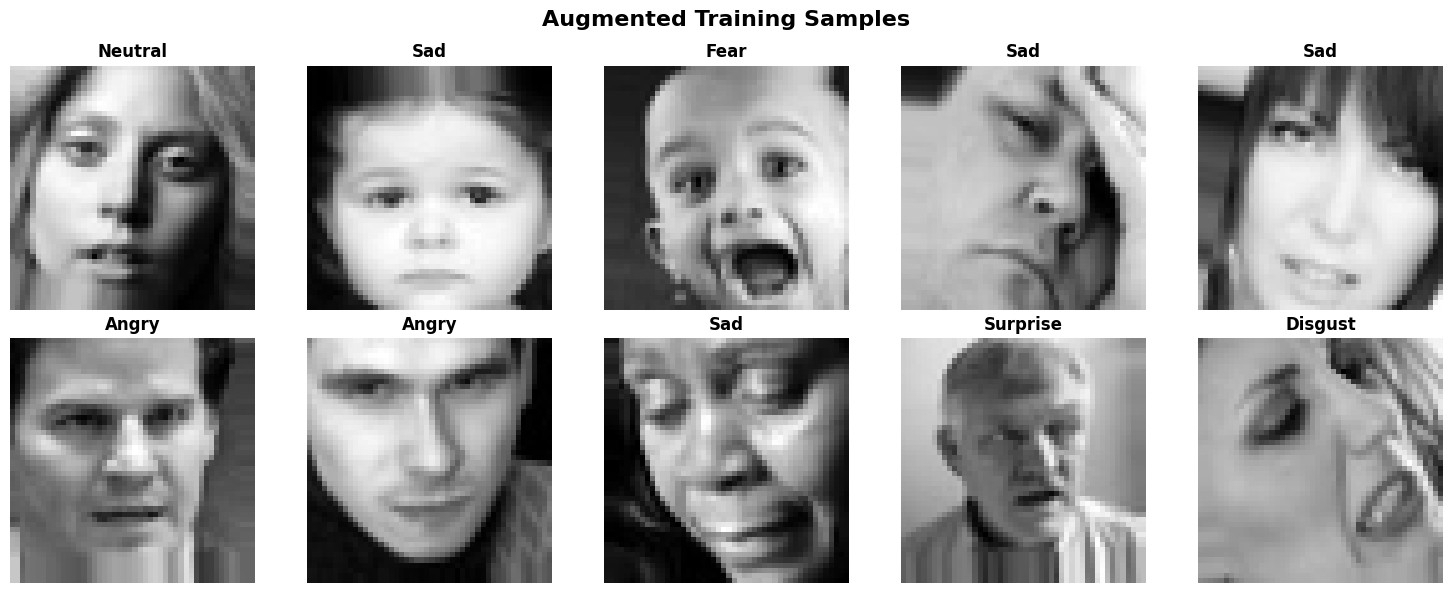

 Augmentation verified. Check that faces look realistic.


In [21]:
# Visualize the augmentation
import matplotlib.pyplot as plt

# Get a batch of augmented training images
images_batch, labels_batch = next(train_generator)

# Convert one-hot labels back to emotion names
emotion_names = list(train_generator.class_indices.keys())

# Plot 10 examples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Augmented Training Samples', fontsize=16, fontweight='bold')

for i in range(10):
    row = i // 5
    col = i % 5

    # Get emotion label
    label_idx = np.argmax(labels_batch[i])
    emotion = emotion_names[label_idx]

    # Display image
    axes[row, col].imshow(images_batch[i].squeeze(), cmap='gray')
    axes[row, col].set_title(f"{emotion.capitalize()}", fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print(" Augmentation verified. Check that faces look realistic.")

In [22]:
# save class weights for training
# These will be used during model.fit()
class_weights_dict = class_weights  # The dictionary we calculated earlier

print("Class weights to use in training:")
print(class_weights_dict)

Class weights to use in training:
{0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


In [ ]:
# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Better CNN architecture
model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Dense layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output
    Dense(7, activation='softmax')
])

# Compile with better learning rate
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Higher starting learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
print("Model built successfully")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,900,775 (7.25 MB)

 Trainable params: 1,897,831 (7.24 MB)

 Non-trainable params: 2,944 (11.50 KB)

Improved model built


In [34]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# More aggressive learning rate schedule
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # More aggressive reduction
    patience=3,  # Reduce sooner
    min_lr=0.00001
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # More patience
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    '/content/best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Train with more epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=100,  # More epochs
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("Training complete")

Epoch 1/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.1591 - loss: 2.7341

381/381 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 0.1591 - loss: 2.7334 - val_accuracy: 0.1800 - val_loss: 2.0506 - learning_rate: 0.0010
Epoch 2/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1406 - loss: 1.9241 - val_accuracy: 0.1737 - val_loss: 2.0544 - learning_rate: 0.0010
Epoch 3/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1781 - loss: 2.0769

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.1782 - loss: 2.0767 - val_accuracy: 0.2001 - val_loss: 1.8406 - learning_rate: 0.0010
Epoch 4/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.2344 - loss: 1.6293

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2344 - loss: 1.6293 - val_accuracy: 0.2043 - val_loss: 1.8388 - learning_rate: 0.0010
Epoch 5/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2063 - loss: 1.9276

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.2063 - loss: 1.9275 - val_accuracy: 0.2962 - val_loss: 1.7303 - learning_rate: 0.0010
Epoch 6/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2031 - loss: 1.6848 - val_accuracy: 0.2959 - val_loss: 1.7289 - learning_rate: 0.0010
Epoch 7/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2488 - loss: 1.8450

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.2488 - loss: 1.8449 - val_accuracy: 0.3095 - val_loss: 1.7151 - learning_rate: 0.0010
Epoch 8/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.3594 - loss: 1.4786

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3594 - loss: 1.4786 - val_accuracy: 0.3118 - val_loss: 1.7126 - learning_rate: 0.0010
Epoch 9/100
380/381 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2986 - loss: 1.7398

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.2986 - loss: 1.7397 - val_accuracy: 0.4167 - val_loss: 1.5368 - learning_rate: 0.0010
Epoch 10/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3750 - loss: 1.9290 - val_accuracy: 0.4142 - val_loss: 1.5384 - learning_rate: 0.0010
Epoch 11/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.3614 - loss: 1.6600 - val_accuracy: 0.3736 - val_loss: 1.6352 - learning_rate: 0.0010
Epoch 12/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2812 - loss: 1.7950 - val_accuracy: 0.3685 - val_loss: 1.6409 - learning_rate: 0.0010
Epoch 13/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3894 - loss: 1.5638

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.3895 - loss: 1.5637 - val_accuracy: 0.4531 - val_loss: 1.4324 - learning_rate: 2.0000e-04
Epoch 14/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.3906 - loss: 1.6358

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3906 - loss: 1.6358 - val_accuracy: 0.4541 - val_loss: 1.4318 - learning_rate: 2.0000e-04
Epoch 15/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4174 - loss: 1.4868

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4174 - loss: 1.4868 - val_accuracy: 0.4701 - val_loss: 1.3801 - learning_rate: 2.0000e-04
Epoch 16/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4375 - loss: 1.2928 - val_accuracy: 0.4699 - val_loss: 1.3793 - learning_rate: 2.0000e-04
Epoch 17/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4315 - loss: 1.4593

381/381 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.4315 - loss: 1.4593 - val_accuracy: 0.4853 - val_loss: 1.3505 - learning_rate: 2.0000e-04
Epoch 18/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4375 - loss: 1.3860

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4375 - loss: 1.3860 - val_accuracy: 0.4872 - val_loss: 1.3500 - learning_rate: 2.0000e-04
Epoch 19/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.4365 - loss: 1.4297 - val_accuracy: 0.4648 - val_loss: 1.4140 - learning_rate: 2.0000e-04
Epoch 20/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3906 - loss: 1.6453 - val_accuracy: 0.4629 - val_loss: 1.4170 - learning_rate: 2.0000e-04
Epoch 21/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4474 - loss: 1.4405

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.4474 - loss: 1.4404 - val_accuracy: 0.5061 - val_loss: 1.3081 - learning_rate: 2.0000e-04
Epoch 22/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5469 - loss: 1.4927 - val_accuracy: 0.5044 - val_loss: 1.3139 - learning_rate: 2.0000e-04
Epoch 23/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4580 - loss: 1.3987

381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.4580 - loss: 1.3987 - val_accuracy: 0.5103 - val_loss: 1.2830 - learning_rate: 2.0000e-04
Epoch 24/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4531 - loss: 1.2624

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4531 - loss: 1.2624 - val_accuracy: 0.5119 - val_loss: 1.2841 - learning_rate: 2.0000e-04
Epoch 25/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4692 - loss: 1.3807

381/381 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.4692 - loss: 1.3806 - val_accuracy: 0.5259 - val_loss: 1.2407 - learning_rate: 2.0000e-04
Epoch 26/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4219 - loss: 1.4282

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4219 - loss: 1.4282 - val_accuracy: 0.5280 - val_loss: 1.2399 - learning_rate: 2.0000e-04
Epoch 27/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.4702 - loss: 1.3667 - val_accuracy: 0.4965 - val_loss: 1.3179 - learning_rate: 2.0000e-04
Epoch 28/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3594 - loss: 1.6261 - val_accuracy: 0.4981 - val_loss: 1.3189 - learning_rate: 2.0000e-04
Epoch 29/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.4859 - loss: 1.3355 - val_accuracy: 0.5233 - val_loss: 1.2461 - learning_rate: 2.0000e-04
Epoch 30/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5469 - loss: 1.4684 - val_accuracy: 0.5231 - val_loss: 1.2458 - learning_rate: 4.0000e-05
Epoch 31/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4970 - loss: 1.2896

381/381 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.4970 - loss: 1.2896 - val_accuracy: 0.5361 - val_loss: 1.2187 - learning_rate: 4.0000e-05
Epoch 32/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5938 - loss: 1.2021 - val_accuracy: 0.5361 - val_loss: 1.2184 - learning_rate: 4.0000e-05
Epoch 33/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5060 - loss: 1.2792

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.5060 - loss: 1.2792 - val_accuracy: 0.5396 - val_loss: 1.2159 - learning_rate: 4.0000e-05
Epoch 34/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4062 - loss: 1.3160 - val_accuracy: 0.5394 - val_loss: 1.2155 - learning_rate: 4.0000e-05
Epoch 35/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5030 - loss: 1.2654

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.5030 - loss: 1.2654 - val_accuracy: 0.5485 - val_loss: 1.2084 - learning_rate: 4.0000e-05
Epoch 36/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4531 - loss: 1.1065

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4531 - loss: 1.1065 - val_accuracy: 0.5487 - val_loss: 1.2085 - learning_rate: 4.0000e-05
Epoch 37/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5073 - loss: 1.2784

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.5073 - loss: 1.2783 - val_accuracy: 0.5497 - val_loss: 1.1973 - learning_rate: 4.0000e-05
Epoch 38/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6250 - loss: 0.9556 - val_accuracy: 0.5485 - val_loss: 1.1973 - learning_rate: 4.0000e-05
Epoch 39/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.5095 - loss: 1.2661 - val_accuracy: 0.5459 - val_loss: 1.2052 - learning_rate: 4.0000e-05
Epoch 40/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.2364 - val_accuracy: 0.5459 - val_loss: 1.2052 - learning_rate: 4.0000e-05
Epoch 41/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.5103 - loss: 1.2457 - val_accuracy: 0.5476 - val_loss: 1.2014 - learning_rate: 1.0000e-05
Epoch 42/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6250 - loss: 1.7124 - val_accuracy: 0.5471 - val_loss: 1.2014 - learning_rate: 1.0000e-05
Epoch 43/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - a

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.5129 - loss: 1.2519 - val_accuracy: 0.5501 - val_loss: 1.1935 - learning_rate: 1.0000e-05
Epoch 46/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4375 - loss: 1.2296

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4375 - loss: 1.2296 - val_accuracy: 0.5504 - val_loss: 1.1933 - learning_rate: 1.0000e-05
Epoch 47/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.5138 - loss: 1.2351 - val_accuracy: 0.5492 - val_loss: 1.1957 - learning_rate: 1.0000e-05
Epoch 48/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5938 - loss: 1.0708 - val_accuracy: 0.5492 - val_loss: 1.1958 - learning_rate: 1.0000e-05
Epoch 49/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.5187 - loss: 1.2247 - val_accuracy: 0.5504 - val_loss: 1.1937 - learning_rate: 1.0000e-05
Epoch 50/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.4688 - loss: 1.2874

381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4688 - loss: 1.2874 - val_accuracy: 0.5506 - val_loss: 1.1936 - learning_rate: 1.0000e-05
Epoch 51/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5187 - loss: 1.2200

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.5187 - loss: 1.2200 - val_accuracy: 0.5522 - val_loss: 1.1857 - learning_rate: 1.0000e-05
Epoch 52/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5625 - loss: 1.0989 - val_accuracy: 0.5522 - val_loss: 1.1855 - learning_rate: 1.0000e-05
Epoch 53/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5138 - loss: 1.2391

381/381 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.5138 - loss: 1.2392 - val_accuracy: 0.5536 - val_loss: 1.1900 - learning_rate: 1.0000e-05
Epoch 54/100
  1/381 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4688 - loss: 1.4337

381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4688 - loss: 1.4337 - val_accuracy: 0.5541 - val_loss: 1.1895 - learning_rate: 1.0000e-05
Epoch 55/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.5167 - loss: 1.2393 - val_accuracy: 0.5506 - val_loss: 1.1910 - learning_rate: 1.0000e-05
Epoch 56/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4844 - loss: 1.1169 - val_accuracy: 0.5504 - val_loss: 1.1912 - learning_rate: 1.0000e-05
Epoch 57/100


KeyboardInterrupt: 

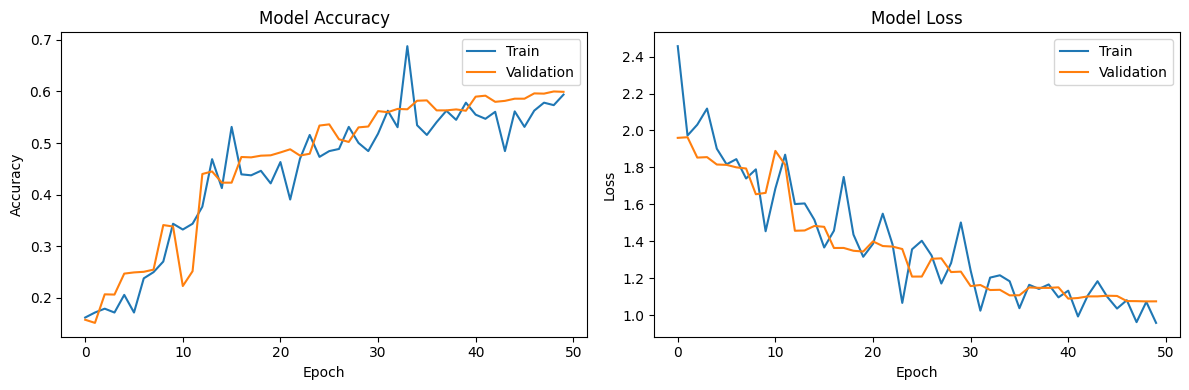

In [29]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Batch shape: (64, 48, 48, 1)
Labels shape: (64, 7)
Pixel range: [0.000, 1.000]
Sample label: [0. 0. 0. 0. 0. 0. 1.]


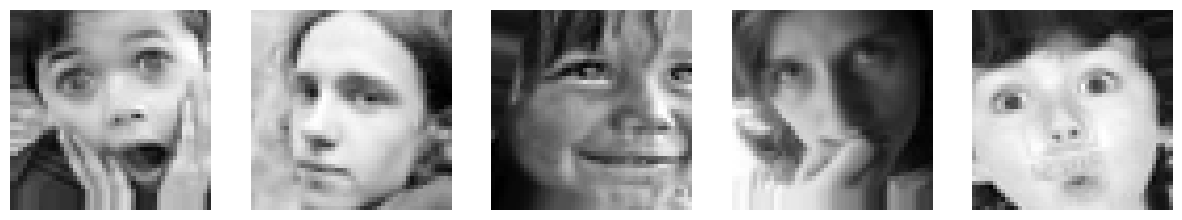

In [26]:
# Verify data is loading correctly
images, labels = next(train_generator)
print(f"Batch shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Pixel range: [{images.min():.3f}, {images.max():.3f}]")
print(f"Sample label: {labels[0]}")

# Show a few images
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()

In [35]:
# Load the best performing model
from tensorflow.keras.models import load_model

model = load_model('/content/best_model.h5')
print("Best model loaded")


Best model loaded


In [36]:
# Evaluate the model performance
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5030 - loss: 1.2649
Test Accuracy: 0.5548
Test Loss: 1.1833


113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.46      0.49      0.48       958
     disgust       0.16      0.77      0.27       111
        fear       0.38      0.15      0.21      1024
       happy       0.85      0.77      0.81      1774
     neutral       0.49      0.61      0.54      1233
         sad       0.47      0.37      0.42      1247
    surprise       0.62      0.82      0.71       831

    accuracy                           0.56      7178
   macro avg       0.49      0.57      0.49      7178
weighted avg       0.57      0.56      0.55      7178



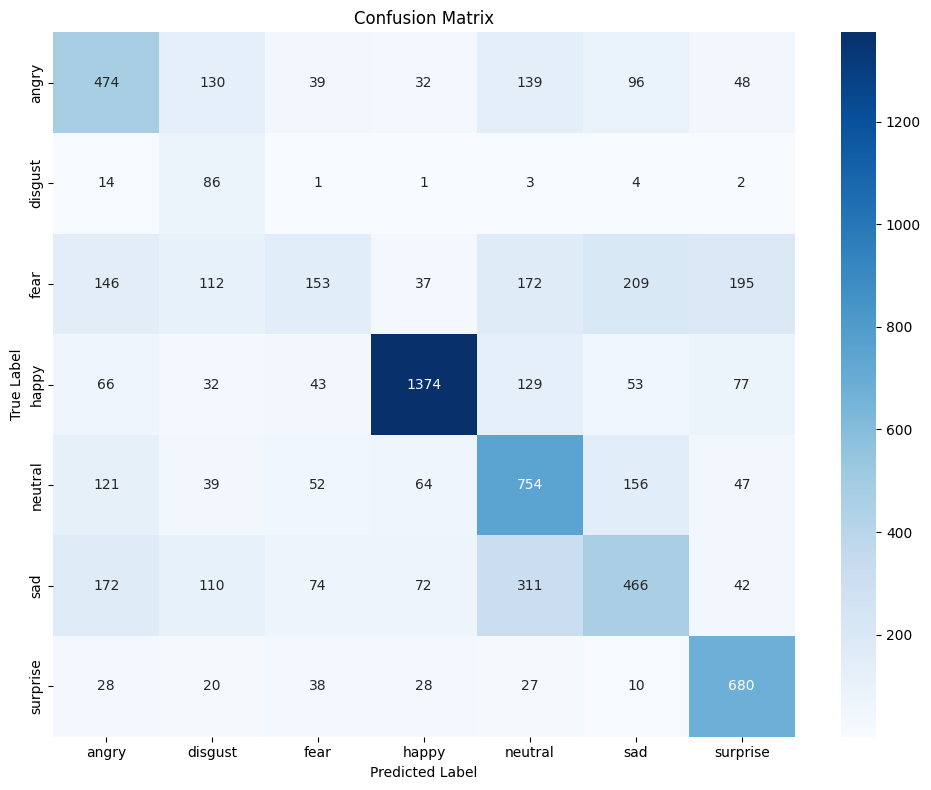

Evaluation complete


In [37]:
# Generate the confusion matrix and classification report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes[:len(predicted_classes)]

# Classification report
emotion_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=emotion_names))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_names, yticklabels=emotion_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('/content/confusion_matrix.png')
plt.show()

print("Evaluation complete")

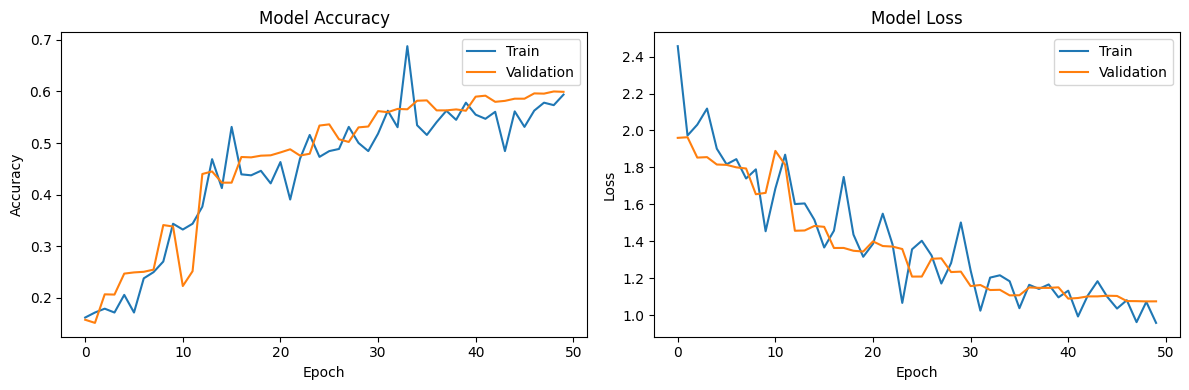

Model and results saved

Files ready for download:
- fer_emotion_model_final.h5
- confusion_matrix.png
- training_history.png


In [38]:
# Save the final model and results
model.save('/content/fer_emotion_model_final.h5')

# Save training history plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/content/training_history.png')
plt.show()

print("Model and results saved")
print("\nFiles ready for download:")
print("- fer_emotion_model_final.h5")
print("- confusion_matrix.png")
print("- training_history.png")